In [43]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy import fftpack
import matplotlib.pyplot as plt
import matplotlib

In [2]:
pow_2_list = [pow(2,i) for i in range(20)]
def FFT(x):
    """Recursive FFT"""
    x = np.asarray(x, dtype=float)
    #while np.log2(N) % 1 > 0:
    while x.size not in pow_2_list:
        x = np.append(x, 0)
    N = x.shape[0]
    if N <= 32:
        return DFT(x)
    X_even = FFT(x[::2])
    X_odd = FFT(x[1::2])
    factor = np.exp(-2j * np.pi * np.arange(N) / N)
    return np.concatenate([X_even + factor[:int(N / 2)] * X_odd,
                           X_even + factor[int(N / 2):] * X_odd])

In [3]:
def DFT(array):
    # make sure it is an array
    array = np.asarray(array, dtype=float)
    # array length
    N = array.shape[0]
    # new array of lenght N [0, N-1]
    n = np.arange(N)
    k = n.reshape((N, 1))
    # Calculate the exponential of all elements in the input array.
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, array)

In [4]:
def IDFT(array):
    """Inverse Discrete Fourier Transform."""
    array = np.asarray(array, dtype=float)
    N = array.shape[0]
    k = np.arange(N)
    n = k.reshape((N, 1))
    e = np.exp(2j * np.pi * n * k / N)
    return 1 / N * np.dot(e, array)


In [5]:
x = np.random.random(1024)

In [9]:
def sample_freq(N, T):
    return np.linspace(0, 1 / T, N)

In [94]:
def nulls_freq_in_signal(signal, max_freq=None, min_freq=None, timestep=0.02):
    """nulls specified freq of signal min or max or range"""
    signal_fft = FFT(signal)
    power = np.abs(signal_fft)
    #time_step = signal[1] - signal[0]
    #fft_freq = [(i*1.0/signal_fft.size)*sample_rate for i in range(signal_fft.size//2+1)]
    fft_freq = fftpack.fftfreq(signal_fft.size, d=time_step)
    filtered_fft = signal_fft.copy()
    if max_freq and not min_freq:
        filtered_fft[np.abs(fft_freq) > max_freq] = 0
    elif min_freq and not max_freq:
        filtered_fft[np.abs(fft_freq) < min_freq] = 0
    else:
        for i in range(fft_freq.size):
            if fft_freq[i] > min_freq and fft_freq[i] < max_freq:
                filtered_fft[i] =0
    filtered_signal = fftpack.ifft(filtered_fft)
    #filtered_signal = IDFT(filtered_fft)
    return filtered_signal

In [11]:
x = np.random.random(1024)

In [12]:
# Let's compare the results of DFT function with FFT
np.allclose(FFT(x), DFT(x))

True

In [13]:
# Let's compare the results of DFT function with numpy FFT
np.allclose(DFT(x), np.fft.fft(x))

True

In [14]:
# Let's compare the results of FFT function with sc FFT
np.allclose(FFT(x), sc.fft(x))

True

In [15]:
# Let's compare the results of FFT function with numpy FFT
np.allclose(FFT(x), np.fft.fft(x))

True

In [16]:
# Let's compare the results of iFFT function with numpy fft
np.allclose(IDFT(FFT(x)), np.fft.ifft(FFT(x)))

False

In [17]:
# compare execution time of DFT and FFt
%timeit DFT(x)
%timeit FFT(x)

50.3 ms ± 13.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.76 ms ± 633 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
sc.ifft(FFT(x))

array([0.04356544-3.97119525e-15j, 0.25793162-1.46542813e-15j,
       0.17009162-2.74821520e-15j, ..., 0.9586045 +2.34142254e-15j,
       0.35809638+9.67313029e-17j, 0.60923965+7.50030594e-16j])

In [19]:
IDFT(FFT(x))

array([0.04356544+0.00000000e+00j, 0.43358564-1.07805976e-15j,
       0.264094  -1.31883159e-15j, ..., 0.92465807-9.08868724e-14j,
       0.264094  +8.95504822e-14j, 0.43358564-2.07229932e-14j])

In [20]:
np.allclose(IDFT(FFT(x)), np.fft.ifft(FFT(x)))

False

In [21]:
IDFT(FFT(x))

array([0.04356544+0.00000000e+00j, 0.43358564-1.07805976e-15j,
       0.264094  -1.31883159e-15j, ..., 0.92465807-9.08868724e-14j,
       0.264094  +8.95504822e-14j, 0.43358564-2.07229932e-14j])

In [22]:
# Seed the random number generator
np.random.seed(1024)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig_with_noise = (np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size))
sig = (np.sin(2 * np.pi / period * time_vec) + 0.5 )
T = time_vec[1] - time_vec[0]
N = sig.size

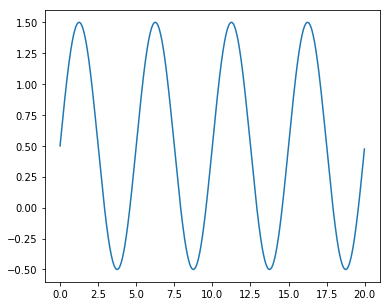

In [23]:
plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

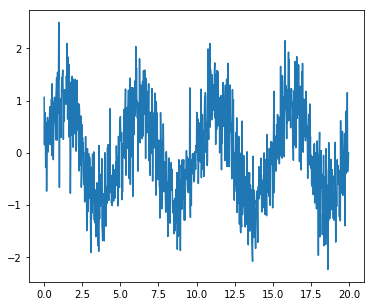

In [24]:
plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig_with_noise, label='Signal with noise')

In [25]:
#sig_fft = DFT(sig_with_noise)
sig_fft = FFT(sig_with_noise)

In [26]:
# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

In [27]:
#fft_freq = sample_freq(sig.size, time_step)
fft_freq = fftpack.fftfreq(sig_fft.size, d=time_step)

Text(0, 0.5, 'power')

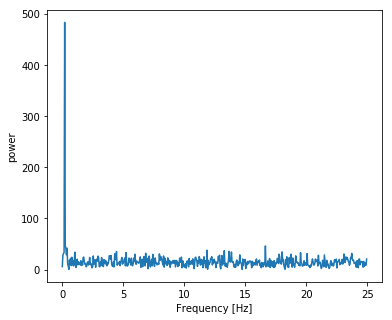

In [28]:
plt.figure(figsize=(6, 5))
plt.plot(fft_freq[:fft_freq.size//2], power[:fft_freq.size//2])
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')

In [29]:
# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(fft_freq > 0)
freqs = fft_freq[pos_mask]
power[pos_mask].argmax()
peak_freq = freqs[power[pos_mask].argmax()]
peak_freq

0.1953125

[]

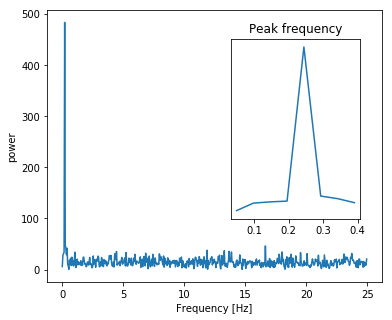

In [30]:
plt.figure(figsize=(6, 5))
plt.plot(fft_freq[:fft_freq.size//2], power[:fft_freq.size//2])
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])


In [31]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(fft_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

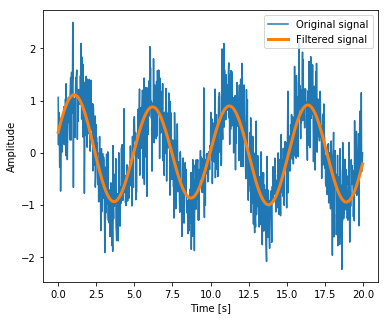

In [32]:
filtered_sig = fftpack.ifft(high_freq_fft)
#filtered_sig = IDFT(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig_with_noise[:len(time_vec)], label='Original signal')
plt.plot(time_vec, filtered_sig[:len(time_vec)], linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

In [80]:
daily_min_temp = pd.read_csv('daily-min-temperatures.csv')

Text(0, 0.5, 'Amplitude')

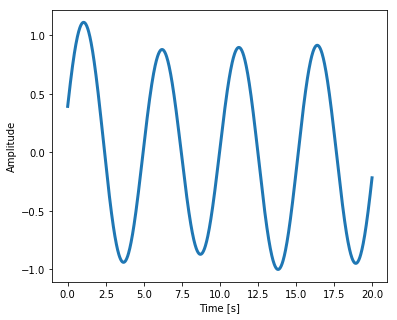

In [165]:
filt_sig = nulls_freq_in_signal(
    signal=sig_with_noise,
    max_freq=0.1953125, 
    #min_freq=0.19, 
    timestep=0.02
)
plt.figure(figsize=(6, 5))
plt.plot(time_vec, filt_sig[:len(time_vec)], linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

In [81]:
# This dataset describes the minimum daily temperatures over 10 years (1981-1990) 
# in the city Melbourne, Australia.

In [82]:
daily_min_temp = daily_min_temp.iloc[0:2000]


In [83]:
daily_min_temp.Date = pd.to_datetime(daily_min_temp.Date)
daily_min_temp.set_index('Date', inplace=True)

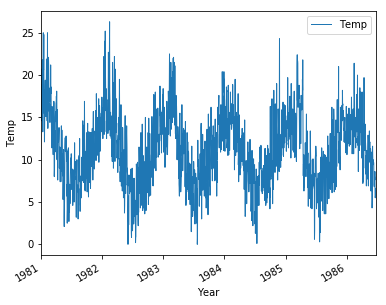

In [110]:
daily_min_temp.plot(figsize=(6,5), linewidth=1)
plt.xlabel('Year')
plt.ylabel('Temp');

In [86]:
temp_signal = daily_min_temp['Temp'].values

In [204]:
temp_signal_filtered = nulls_freq_in_signal(
    signal=temp_signal,
    max_freq=0.3, 
    min_freq=None, 
    timestep=1)

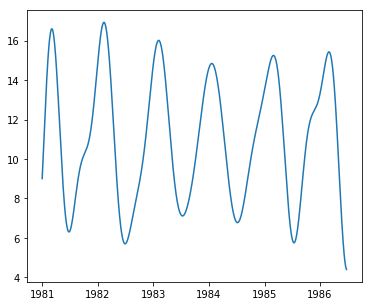

In [205]:
plt.figure(figsize=(6, 5))
plt.plot(daily_min_temp.index, temp_signal_filtered[:daily_min_temp.index.size],  label='Original signal')